In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
import scipy as sp
import pickle as pkl
import nbimporter
import power_analysis
%matplotlib inline

Importing Jupyter notebook from power_analysis.ipynb


In [64]:
file_path = '/Users/yzamora/power/STREAM_little.results'
df = pd.read_csv(file_path, sep='\s+')
df = power_analysis.create_col(df)
print(df.head())


file_2 = '/Users/yzamora/power/all.out'
df_2 = pd.read_csv(file_2, sep='\s+')
df_2 = power_analysis.create_col(df_2)
print(df_2.head())


file_path_big = '/Users/yzamora/power/STREAM_big.results'
df_3 = pd.read_csv(file_path_big, sep='\s+')
df_3 = power_analysis.create_col(df_3)
print(df.head())


  cores    freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0  0x10  100000  5.927234  3.663066  309.002694         NaN        NaN   
1  0x10  200000  5.924613  3.709806  313.083883         NaN        NaN   
2  0x10  400000  5.925540  3.669108  309.600800         NaN        NaN   
3  0x10  600000  5.925273  3.644242  307.516445         NaN        NaN   
4  0x10  700000  5.925954  3.639829  307.109115         NaN        NaN   

   big_cores  lil_cores  total_cores  core-0  core-1  core-2  core-3  core-4  \
0          1          0            1       0       0       0       1       0   
1          1          0            1       0       0       0       1       0   
2          1          0            1       0       0       0       1       0   
3          1          0            1       0       0       0       1       0   
4          1          0            1       0       0       0       1       0   

   core-5  core-6  core-7  
0       0       0       0  
1       0       0 

In [3]:
#df = df.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY','big_cores','lil_cores','total_cores'])
df = df.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])
df_2 = df_2.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])
df_3 = df_3.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])

In [4]:
print(df.head())
print(df_2.head())
print(df_3.head())

     freq      Rate     Power      Energy  big_cores  lil_cores  total_cores  \
0  100000  5.927234  3.663066  309.002694          1          0            1   
1  200000  5.924613  3.709806  313.083883          1          0            1   
2  400000  5.925540  3.669108  309.600800          1          0            1   
3  600000  5.925273  3.644242  307.516445          1          0            1   
4  700000  5.925954  3.639829  307.109115          1          0            1   

   core-0  core-1  core-2  core-3  core-4  core-5  core-6  core-7  
0       0       0       0       1       0       0       0       0  
1       0       0       0       1       0       0       0       0  
2       0       0       0       1       0       0       0       0  
3       0       0       0       1       0       0       0       0  
4       0       0       0       1       0       0       0       0  
     freq      Rate     Power      Energy  big_cores  lil_cores  total_cores  \
0  100000  5.887958  5.439624  

## Plotting 3 different values

In [5]:
def plot_3(df_1,label1, df_2, label2, df_3, label3, application_name):
    df = df_1
    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.scatter(x=(df['Rate']),y=(df['Power']),label=label1)
    #ax=fig.add_subplot(212)
    ax.scatter(x=(df_2['Rate']),y=(df_2['Power']),label=label2)
    ax.scatter(x=(df_3['Rate']),y=(df_3['Power']),label=label3)

    
    plt.title(application_name + " Results")
    plt.legend(loc='best');
    ax.set_xlabel('Rate')
    ax.set_ylabel('Power (Watts)')
    plt.figure(figsize=(20,20))
    plt.show()
    
def plot_1(df_1,df_label,application_name):
    df = df_1
    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.scatter(x=(df['Rate']),y=(df['Power']),label=df_label)
    
    plt.title(application_name + " Results")
    plt.legend(loc='best');
    ax.set_xlabel('Rate')
    ax.set_ylabel('Power (Watts)')
    plt.figure(figsize=(20,20))
    plt.show()

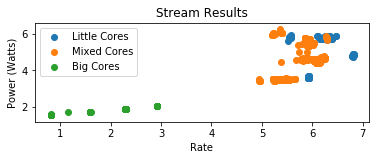

<Figure size 1440x1440 with 0 Axes>

In [6]:
plot_3(df,"Little Cores", df_2, "Mixed Cores", df_3, "Big Cores", "Stream")


In [7]:
def threed_graph(df):
    #colors=['blue', 'c', 'y', 'm', 'r']
    core_rate = df['Rate'].values
    core_power = df['Power'].values
    #print (df['big_cores'])
    core_big = df['big_cores'].values
    core_lil = df['lil_cores'].values
    core_all = df['total_cores'].values

    ax = plt.subplot(111,projection='3d')
    ax.plot(core_rate, core_lil, core_power,'.',c = "blue", label ='Little Cores')
    ax.plot(core_rate, core_all, core_power,'o',c = "green", label ='All Cores')
    ax.plot(core_rate, core_big, core_power,'p',c= "red", label ='Big Cores')

    #ax.legend()
    #plt.legend(loc='upper center', numpoints=1, ncol=3, fontsize=10, bbox_to_anchor=(0, 0))
    plt.legend(loc=2)
    ax.set_zlabel('Power')
    ax.set_ylabel("Number of Cores")
    ax.set_xlabel("Rate")
    #ax = fig.gca(projection='3d')

    plt.title('Mixed Cores = Rate vs Power')


## Importing only little + only big cores + mixed data

In [8]:
file_path = '/Users/yzamora/power/little_big.out'

df_lb = pd.read_csv(file_path, sep='\s+')
df_lb = power_analysis.create_col(df_lb)
df = df_lb.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])


Plottingr rate VS number of cores VS Power

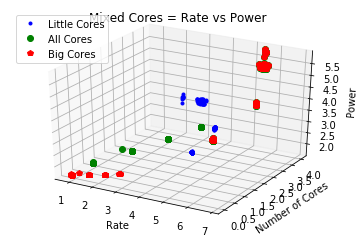

In [9]:
threed_graph(df)

## Importing SHA Results

In [10]:
file_path = '/Users/yzamora/power/SHA.results'
df = pd.read_csv(file_path, sep='\s+')
df = power_analysis.create_col(df)

print(df.head())

  cores    freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0  0x01  100000  3.103316  1.513771  487.791360         NaN        NaN   
1  0x01  200000  3.104545  1.524862  491.170706         NaN        NaN   
2  0x01  400000  3.103783  1.527651  492.189903         NaN        NaN   
3  0x01  600000  3.103883  1.529674  492.825780         NaN        NaN   
4  0x01  700000  3.104054  1.530322  493.007464         NaN        NaN   

   big_cores  lil_cores  total_cores  core-0  core-1  core-2  core-3  core-4  \
0          0          1            1       0       0       0       0       0   
1          0          1            1       0       0       0       0       0   
2          0          1            1       0       0       0       0       0   
3          0          1            1       0       0       0       0       0   
4          0          1            1       0       0       0       0       0   

   core-5  core-6  core-7  
0       0       0       1  
1       0       0 

In [11]:
file_path = '/Users/yzamora/power/SHA_mixed.results'
file_path_2 = '/Users/yzamora/power/SHA.results'

sha = pd.read_csv(file_path, sep='\s+')
sha = power_analysis.create_col(sha)

sha_2 = pd.read_csv(file_path_2, sep='\s+')
sha_2 = power_analysis.create_col(sha_2)
print(sha.head())

  cores    freq       Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0  0xac  100000  14.147655  4.952115  350.030344         NaN        NaN   
1  0xac  200000  14.166868  5.047405  356.282186         NaN        NaN   
2  0xac  400000  14.223582  5.126936  360.452824         NaN        NaN   
3  0xac  600000  14.209961  5.118100  360.176563         NaN        NaN   
4  0xac  700000  14.179102  5.054805  356.496693         NaN        NaN   

   big_cores  lil_cores  total_cores  core-0  core-1  core-2  core-3  core-4  \
0          2          2            4       1       0       1       0       1   
1          2          2            4       1       0       1       0       1   
2          2          2            4       1       0       1       0       1   
3          2          2            4       1       0       1       0       1   
4          2          2            4       1       0       1       0       1   

   core-5  core-6  core-7  
0       1       0       0  
1       1   

In [12]:
sha = sha.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])
sha_2 = sha_2.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])

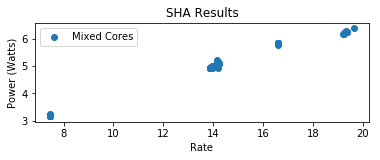

<Figure size 1440x1440 with 0 Axes>

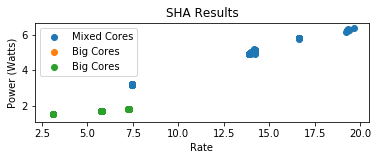

<Figure size 1440x1440 with 0 Axes>

In [13]:
plot_1(sha,"Mixed Cores","SHA")
plot_3(sha,"Mixed Cores",sha_2, "Big Cores", sha_2, "Big Cores", "SHA")

In [14]:
def plot_3(data_1, label1, data_2, label2, data_3, label3, application_name):
    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.scatter(data_1,data_3,label=label1)
    #ax=fig.add_subplot(212)
    ax.scatter(data_2,data_3,label=label2)
    
    plt.title(application_name + " Results")
    plt.legend(loc='best');
    ax.set_xlabel('Rate')
    ax.set_ylabel('Power (Watts)')
    plt.figure(figsize=(20,20))
    plt.show()

In [23]:
def bar_graph(df,title):
    fig=plt.figure()
    ax=fig.add_subplot(211)
    data = ("0_core" ,"2_cores", "3_cores", "4_cores", "5_cores", "6_cores", "7_cores","1_cores")
    data_x = ["core-0","core-1","core-2","core-3","core-4","core-5","core-5","core-6","core-7"]
    data_y = []
    y_pos = np.arange(len(data_x))
    for x in data_x:
        data_y.append( df[x].sum() )

    plt.bar(y_pos, data_y, align='center', alpha=0.5)
    plt.xticks(y_pos, data_x)
    ax.set_xlabel("Core Location", fontsize=16)
    ax.set_ylabel("Number", fontsize=16)
    plt.title(title)
    plt.show()



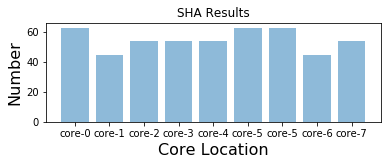

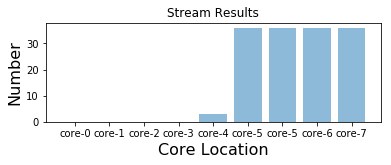

In [24]:

bar_graph(sha,"SHA Results")
bar_graph(df, "Stream Results")


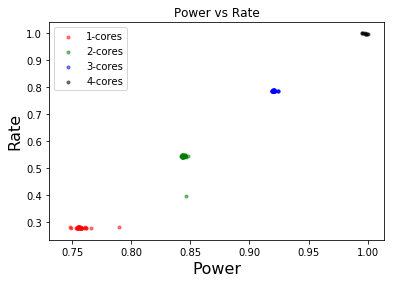

In [62]:
#print(df_3) # little cores
fig=plt.figure()
ax=fig.add_subplot(111)

colors = ("red", "green", "blue", "black")
area = np.pi*3

xlabel = 'Power'
ylabel = 'Rate' #'Energy' # 'Rate' # 'freq'
    
dfg = df_3.groupby('lil_cores')
X_max = 0; Y_max = 0
for name,group in dfg:
    X = group[ xlabel ].tolist()
    Y = group[ ylabel ].tolist()
    X_max = max ( max(X), X_max)
    Y_max = max ( max(Y), Y_max)
ii=0
for name,group in dfg:
    X = group[ xlabel ].tolist()
    Y = group[ ylabel ].tolist()
    X = [float(i)/X_max for i in X]
    Y = [float(i)/Y_max for i in Y]
    
    plt.scatter(X[:], Y[:], s=area, c=colors[ii], alpha=0.5, label=str(name)+'-cores' )
    ii+=1
    
ax.set_xlabel( xlabel, fontsize=16)
ax.set_ylabel( ylabel, fontsize=16)
plt.title(xlabel+" vs "+ylabel)
plt.legend(loc='best')
plt.show()


    cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0    0xe6   100000  5.887958  5.439624  461.927430         NaN        NaN   
1    0xe6   200000  5.888939  5.474008  464.770101         NaN        NaN   
2    0xe6   400000  5.897709  5.441137  461.291977         NaN        NaN   
3    0xe6   600000  5.897312  5.442045  461.399975         NaN        NaN   
4    0xe6   700000  5.908167  5.432657  459.758156         NaN        NaN   
5    0xe6   800000  5.893648  5.440728  461.575041         NaN        NaN   
6    0xe6  1000000  5.892087  5.463399  463.621307         NaN        NaN   
7    0xe6  1200000  5.879515  5.468053  465.008695         NaN        NaN   
8    0xe6  1400000  5.890988  5.457655  463.220651         NaN        NaN   
9    0xda   100000  5.904099  5.387178  456.223404         NaN        NaN   
10   0xda   200000  5.900255  5.434772  460.553992         NaN        NaN   
11   0xda   400000  5.891115  5.452016  462.731679         NaN        NaN   

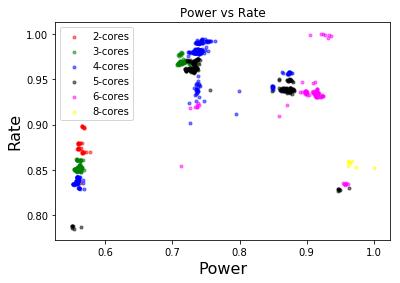

In [71]:
print(df_2) # little cores
fig=plt.figure()
ax=fig.add_subplot(111)

colors = ("red", "green", "blue", "black","magenta", "yellow", "cyan", "brown")
area = np.pi*3

xlabel = 'Power'
ylabel = 'Rate' #'Energy' # 'Rate' # 'freq'
    
dfg = df_2.groupby('total_cores')
X_max = 0; Y_max = 0
for name,group in dfg:
    X = group[ xlabel ].tolist()
    Y = group[ ylabel ].tolist()
    X_max = max ( max(X), X_max)
    Y_max = max ( max(Y), Y_max)
ii=0
for name,group in dfg:
    X = group[ xlabel ].tolist()
    Y = group[ ylabel ].tolist()
    X = [float(i)/X_max for i in X]
    Y = [float(i)/Y_max for i in Y]
    
    plt.scatter(X[:], Y[:], s=area, c=colors[ii], alpha=0.5, label=str(name)+'-cores' )
    ii+=1
    
ax.set_xlabel( xlabel, fontsize=16)
ax.set_ylabel( ylabel, fontsize=16)
plt.title(xlabel+" vs "+ylabel)
plt.legend(loc='best')
plt.show()